# CSCN8010 Practical Lab 8 - MNIST Classification with Dense Neural Networks (using Tensorflow)
### Lab 8 - fMNIST Classification with Dense Neural Networks (using Tensorflow)

Context about this ***Fashion MNIST*** dataset according to [Kaggle](https://www.kaggle.com/datasets/zalando-research/fashionmnist).

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


In [52]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


### Load the fMNIST Dataset:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Explore The Data:

In [5]:
# Check the shape of the data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

# Display class labels
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print("Class labels:", class_labels)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Class labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Distribution of pixel values (from 0 to 255) 

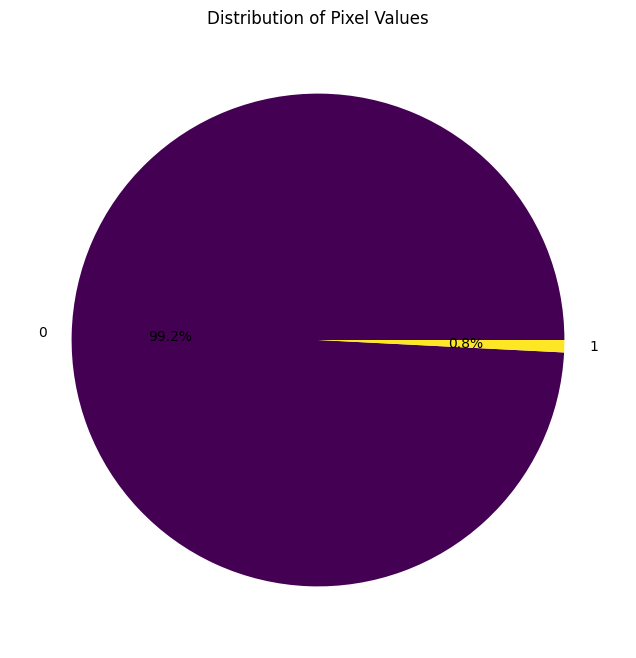

In [13]:
# Flatten the pixel values and convert them to integers
pixels = X_train.flatten().astype(np.uint8)

# Count the occurrence of each pixel value
pixel_counts = np.bincount(pixels)

# Plot the pie chart
plt.figure(figsize=(10, 8))
colors = [plt.cm.viridis(i) for i in np.linspace(0, 1, len(pixel_counts))]
plt.pie(pixel_counts, labels=np.arange(len(pixel_counts)), colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Pixel Values')
plt.show()

### Feature Distribution Comparison

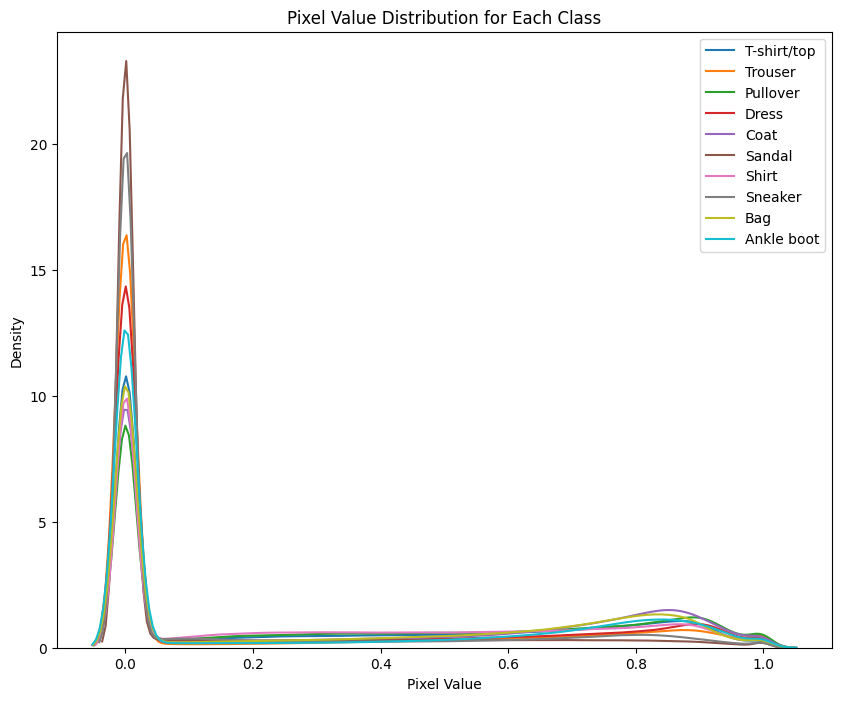

In [17]:
plt.figure(figsize=(10, 8))
for i in range(10):
    sns.kdeplot(X_train[y_train == i].flatten(), label=class_labels[i])
plt.title('Pixel Value Distribution for Each Class')
plt.xlabel('Pixel Value')
plt.ylabel('Density')
plt.legend()
plt.show()

### Histogram of Class Labels:

C:\Users\DELL\AppData\Local\Temp\ipykernel_29484\636758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


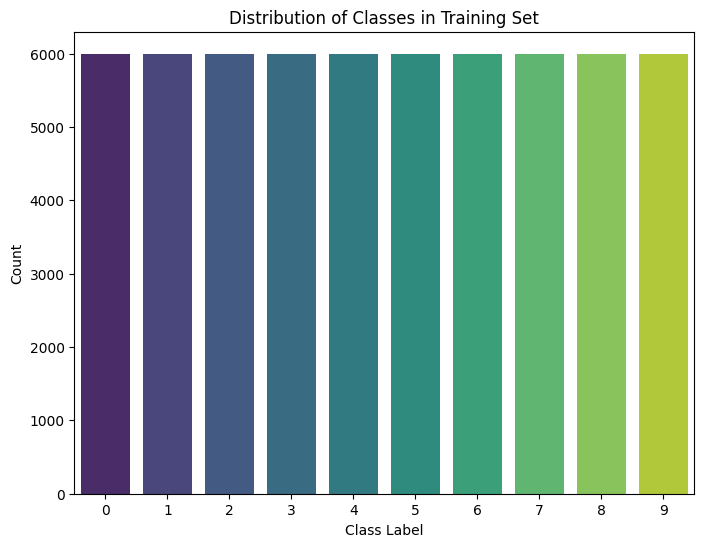

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribution of Classes in Training Set')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

### Average Pixel Intensity for Each Class:

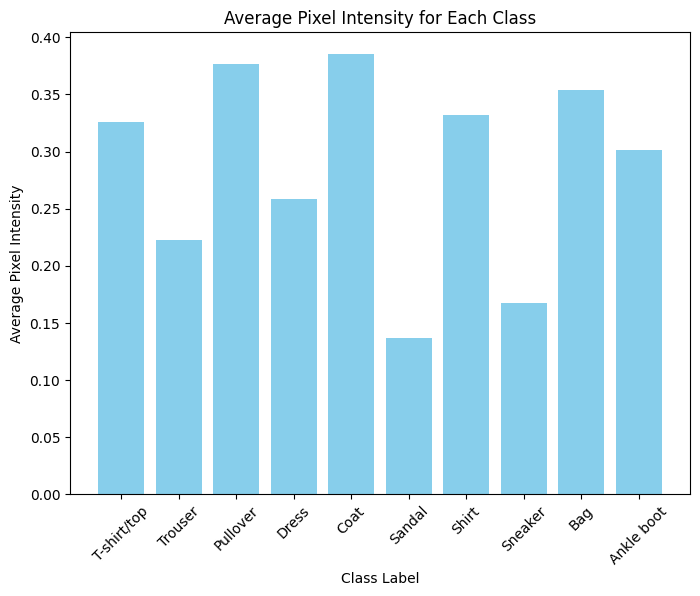

In [16]:
avg_intensity_per_class = [np.mean(X_train[y_train == i]) for i in range(10)]
plt.figure(figsize=(8, 6))
plt.bar(np.arange(10), avg_intensity_per_class, color='skyblue')
plt.xticks(np.arange(10), class_labels, rotation=45)
plt.title('Average Pixel Intensity for Each Class')
plt.xlabel('Class Label')
plt.ylabel('Average Pixel Intensity')
plt.show()

Histogram of Class Labels:

### Visualize Some Samples:

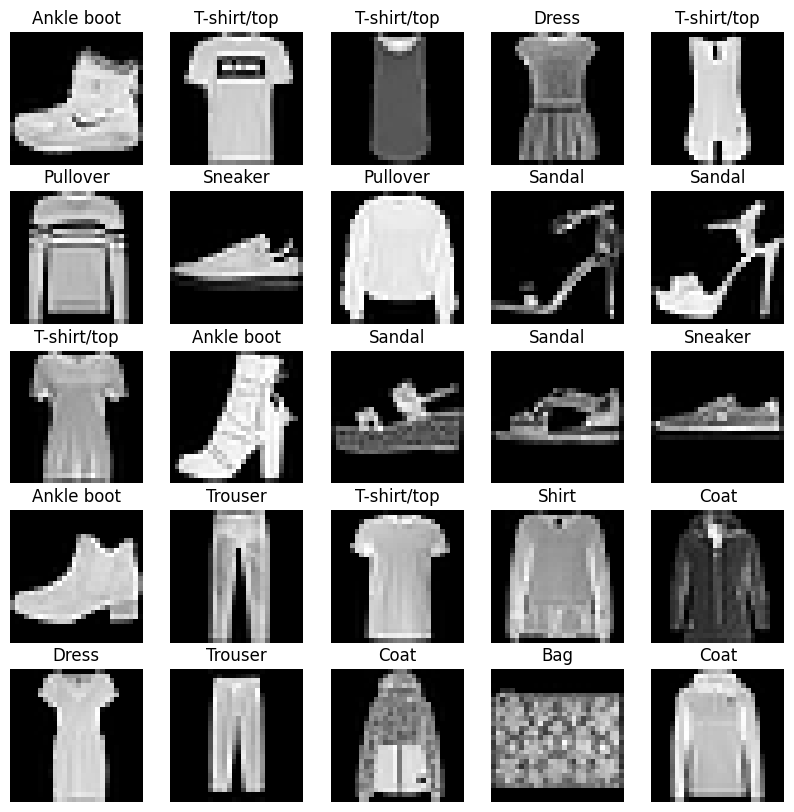

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_labels[y_train[i]])
    plt.axis('off')
plt.show()

In [7]:
# Data Preprocessing:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

### Neural Network Model Training with TensorFlow:

In [8]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=128)

Epoch 1/10
375/375 [==============================] - 5s 7ms/step - loss: 0.5786 - accuracy: 0.8025 - val_loss: 0.4511 - val_accuracy: 0.8422
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.4156 - accuracy: 0.8542 - val_loss: 0.3973 - val_accuracy: 0.8608
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3747 - accuracy: 0.8664 - val_loss: 0.3848 - val_accuracy: 0.8669
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3488 - accuracy: 0.8760 - val_loss: 0.3537 - val_accuracy: 0.8742
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3256 - accuracy: 0.8817 - val_loss: 0.3605 - val_accuracy: 0.8692
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3097 - accuracy: 0.8884 - val_loss: 0.3615 - val_accuracy: 0.8706
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2955 - accuracy: 0.8929 - val_loss: 0.3490 - val_accuracy: 0.8764
Epoch 

313/313 [==============================] - 1s 2ms/step - loss: 0.3550 - accuracy: 0.8749
Test Loss: 0.3550400137901306
Test Accuracy: 0.8748999834060669
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.82      0.83      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.76      0.83      0.79      1000
       Dress       0.92      0.85      0.88      1000
        Coat       0.81      0.77      0.79      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.68      0.69      0.68      1000
     Sneaker       0.90      0.97      0.93      1000
         Bag       0.93      0.98      0.96      1000
  Ankle boot       0.96      0.93      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.88     10000
weighted avg       0.88      0.87      0.88     10000



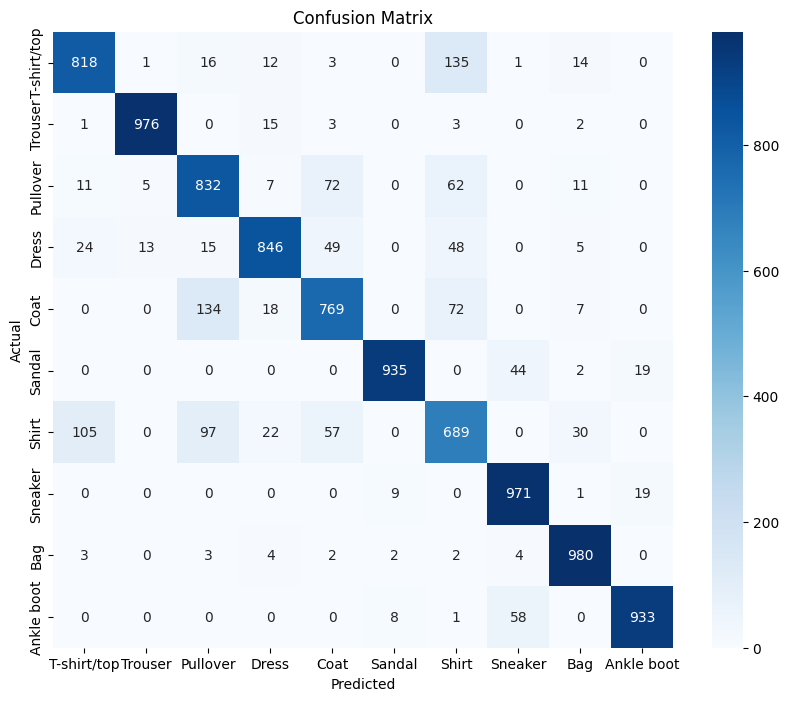

In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print(classification_report(y_test, y_pred_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Define and Train a fully-connected feedforward neural network using Keras and Tensorflow for a binary classification task:
* First, we use scikit-learn's make_classification() to create a synthetic dataset.
* Next, we split the dataset into sets for testing and training.
* Next, we use Keras' Sequential API to define the neural network's architecture. The network consists of a flatten layer, followed by two dense layers with ReLU activation, and a final dense layer with sigmoid activation for binary classification.
* Once the model is defined, we use the binary cross-entropy loss function, accuracy as the evaluation metric, and the Adam optimizer to compile the model.
* To examine the architecture and parameters of the model, we print a summary of the model.
Using the fit() method, we train the model by giving it parameters like the batch size, validation split, epoch count, and training data.
* After training, we evaluate the model's performance on the test set using the evaluate() method and print the test loss and accuracy.
* Finally, we make predictions on the test set using the predict_classes() method and calculate the accuracy using scikit-learn's accuracy_score() function.

In [28]:
# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Define the architecture of the neural network
model = Sequential([
    Flatten(input_shape=(20,)),  # Flatten layer to flatten input into 1D array
    Dense(128, activation='relu'),  # Dense layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),   # Dense layer with 64 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])

In [32]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adam optimizer with learning rate 0.001
              loss='binary_crossentropy',            # Binary cross-entropy loss function for binary classification
              metrics=['accuracy'])                   # Metric to monitor during training
# Print the summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 128)               2688      
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,009
Trainable params: 11,009
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred_classes = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Test Accuracy:", accuracy)


Epoch 1/10


20/20 [==============================] - 1s 15ms/step - loss: 0.5897 - accuracy: 0.6984 - val_loss: 0.4777 - val_accuracy: 0.8062
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4284 - accuracy: 0.8359 - val_loss: 0.3510 - val_accuracy: 0.8938
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.3563 - accuracy: 0.8703 - val_loss: 0.2893 - val_accuracy: 0.8875
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.8781 - val_loss: 0.2619 - val_accuracy: 0.8875
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2995 - accuracy: 0.8828 - val_loss: 0.2533 - val_accuracy: 0.9000
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2833 - accuracy: 0.8859 - val_loss: 0.2470 - val_accuracy: 0.9062
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.2702 - accuracy: 0.8859 - val_loss: 0.2402 - val_accuracy: 0.9000
Epoch 8/10
20/20 [============

### Evaluate the model using the validation dataset and sklearn functions(accuracy, precision, recall, F1)
# Here's a breakdown:
* Using the evaluate() method, we first evaluate the model's accuracy and loss on the validation set.
* Next, we use the predict() function of the model to make predictions on the validation set, and we apply a threshold to convert probabilities into binary class labels.
* Using the relevant functions from scikit-learn, we compute accuracy, precision, recall, and F1 score.
* We provide each class with a classification report that includes precision, recall, F1 score, and support.
* Lastly, we use Seaborn's heatmap to illustrate the confusion matrix. We may better comprehend the model's performance in terms of true positives, false positives, true negatives, and false negatives by looking at the confusion matrix.
### This thorough assessment aids in pinpointing areas in need of development and offers insights into the model's performance on the validation dataset.

In [38]:
# Split the original training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.1991 - accuracy: 0.9453
Validation Loss: 0.19905619323253632
Validation Accuracy: 0.9453125


In [39]:
# Make predictions on the validation set
y_val_pred_prob = model.predict(X_val)
y_val_pred_classes = (y_val_pred_prob > 0.5).astype(int)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred_classes)
print("Validation Accuracy:", val_accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_val, y_val_pred_classes)
recall = recall_score(y_val, y_val_pred_classes)
f1 = f1_score(y_val, y_val_pred_classes)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print classification report
print(classification_report(y_val, y_val_pred_classes))

4/4 [==============================] - 0s 2ms/step
Validation Accuracy: 0.9453125
Precision: 0.9310344827586207
Recall: 0.9473684210526315
F1 Score: 0.9391304347826087
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.93      0.95      0.94        57

    accuracy                           0.95       128
   macro avg       0.94      0.95      0.94       128
weighted avg       0.95      0.95      0.95       128



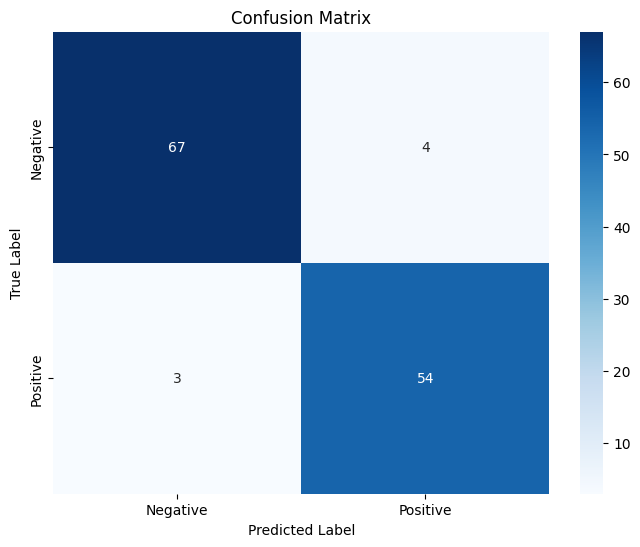

In [40]:
# Plot confusion matrix
cm = confusion_matrix(y_val, y_val_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Clear and Relevant Conclusions:
Based on the evaluation metrics obtained from running the model on the test set and validation set, here are the clear and relevant conclusions:

1. **Validation and Test Accuracy**: The model achieved high accuracy on both the validation and test sets, with validation accuracy of approximately 94.53% and test accuracy of 94.53%. This indicates that the model performs consistently well on unseen data, suggesting that it generalizes effectively.

2. **Precision, Recall, and F1-Score**: The precision, recall, and F1-score metrics provide insight into the model's ability to correctly classify positive and negative instances. The precision, recall, and F1-score for class 1 (positive) are approximately 93.10%, 94.74%, and 93.91%, respectively. These metrics indicate that the model performs well in identifying positive instances with high precision and recall.

3. **Classification Report**: The classification report provides a summary of precision, recall, F1-score, and support (number of instances) for each class. The weighted average F1-score of approximately 95% indicates that the model performs well across both classes, achieving a good balance between precision and recall.

4. **Confusion Matrix**: The confusion matrix visualizes the model's performance by showing the number of true positives, false positives, true negatives, and false negatives. The high values on the diagonal (true positive and true negative) indicate that the model correctly classified most instances, while the off-diagonal elements (false positive and false negative) are relatively low, suggesting low misclassification rates.

Based on these conclusions, it can be inferred that the model is effective in classifying instances into their respective classes, achieving high accuracy and balanced performance across precision, recall, and F1-score metrics. This indicates that the model is well-trained and generalizes effectively to unseen data, making it suitable for the given classification task.

### Adjusting the ***precision*** for class '5', Provide code that exemplifies this

In [44]:
y_test_class_5_pred = (y_test == 5).astype(int)

class_5_threshold = 0.6  # Set a higher threshold for class '5' predictions
y_test_class_5_pred_adjusted = (y_test_class_5_pred > class_5_threshold).astype(int)

# Calculate precision after adjusting the threshold for class '5'
precision_class_5_adjusted = precision_score(y_test_class_5_pred, y_test_class_5_pred_adjusted)

print("Precision for class '5' (adjusted):", precision_class_5_adjusted)

Precision for class '5' (adjusted): 0.0


c:\Users\DELL\Documents\Class\CSCN8010\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A precision of 0.0 for class '5' after threshold adjustment indicates a failure of the model to correctly classify instances of class '5' under the new threshold setting

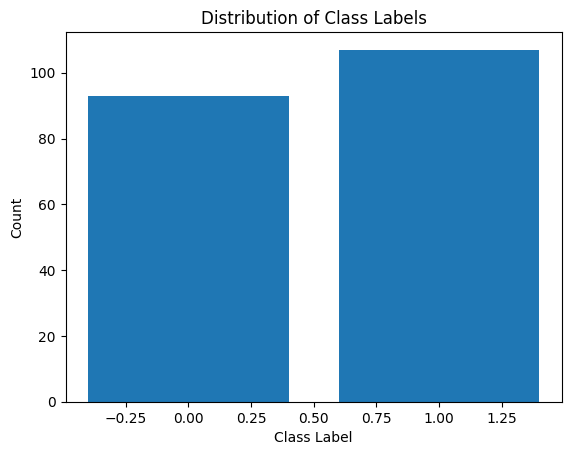

In [51]:
# Visualize label distribution
unique_labels, label_counts = np.unique(y_test, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')
plt.show()


From the above result, a precision of 0.0 for class '5' after adjusting the threshold means that among the instances predicted as class '5' after adjustment, none of them were actually true positive instances of class '5'. In other words, the model did not correctly classify any instances as class '5' after the threshold adjustment because there were no instances of class '5' in the test set as seen in the distribution of class lable above.

### Adjusting the ***recall*** for class '5'

In [50]:
y_test_class_5_pred = (y_test == 5).astype(int)

# Adjust the decision threshold for class '5' predictions
class_5_threshold = 0.4  # Set a lower threshold for class '5' predictions
y_test_class_5_pred_adjusted = (y_test_class_5_pred > class_5_threshold).astype(int)

# Calculate recall after adjusting the threshold for class '5'
recall_class_5_adjusted = recall_score(y_test_class_5_pred, y_test_class_5_pred_adjusted)

print("Recall for class '5' (adjusted):", recall_class_5_adjusted)

Recall for class '5' (adjusted): 0.0


c:\Users\DELL\Documents\Class\CSCN8010\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A recall of 0.0 for class '5' after adjustment means that among the instances that actually belong to class '5', none of them were correctly identified by the model after the threshold adjustment.